In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
Base_t = pd.read_csv('BASE_TREINO2.csv', delimiter=';')
Base = pd.read_csv('BASE_TREINO.csv')
Base_2 = pd.read_csv('Match.csv')

In [3]:
ano = Base.season.str.slice(5, 9)
Base['Ano'] = ano

In [4]:
Base_resultado_aux = Base.query("season == '2015/2016'")

Base_resultado = pd.DataFrame()
Base_resultado['match_api_id'] = Base_resultado_aux.match_api_id
Base_resultado['home_team_api_id'] = Base_resultado_aux.home_team_api_id
Base_resultado['away_team_api_id'] = Base_resultado_aux.away_team_api_id

Base_resultado.to_csv("resultado_final_infos.csv")

In [5]:
Base_t = Base_t.drop(['DATA','DATA_NUM','match_api_id','home_team_api_id','away_team_api_id','home_team_goal',
                      'away_team_goal','resultado_h','resultado_a'], axis=1)
Base = Base.merge(Base_t, how='left', on='id', suffixes=('', ''))

In [6]:
set(ano)

{'2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'}

In [7]:
colunas = 'id','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'

teste = []

for coluna in colunas:
    teste.append(Base_2[coluna])
teste_2 = pd.DataFrame(teste)
teste_3 = teste_2.transpose()

Base_3 = Base.merge(teste_3, how='left', on='id', suffixes=('', ''))
Base = Base_3.copy()

Retiro das as variáveis que nao fazem sentido para modelo

In [8]:
Base = Base.drop(['match_api_id','id','country_id','league_id','season','home_team_api_id','away_team_api_id','DATA'], axis=1)
Base = Base.drop(['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11'], axis=1)
Base = Base.drop(['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'], axis=1)

In [9]:
Teste = Base.columns
Teste = pd.DataFrame(Teste)
Teste.to_csv("Colunas.csv")

In [10]:
#Criar variáveis Dummy
Base=pd.get_dummies(Base)

Analise inicial das variáveis

In [11]:
Base.describe()

,stage,DATA_NUM,home_team_goal,away_team_goal,overall_rating_H1,potential_H1,crossing_H1,finishing_H1,heading_accuracy_H1,short_passing_H1,...,defensive_work_rate_A11_ormal,defensive_work_rate_A11_tocky,Ano_2009,Ano_2010,Ano_2011,Ano_2012,Ano_2013,Ano_2014,Ano_2015,Ano_2016
count,2448.000000,2448.000000,2448.000000,2448.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.00000,2436.000000,...,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,17.500000,41092.611928,1.626634,1.274918,75.214286,80.183087,19.225369,18.646552,19.30665,28.202381,...,0.002451,0.000408,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
std,9.812713,841.645944,1.339529,1.200392,6.408610,5.681352,6.137750,6.289742,6.09837,7.075052,...,0.049457,0.020211,0.330786,0.330786,0.330786,0.330786,0.330786,0.330786,0.330786,0.330786
min,1.000000,39674.000000,0.000000,0.000000,53.000000,63.000000,5.000000,7.000000,7.00000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,40383.000000,1.000000,0.000000,72.000000,76.000000,14.000000,13.000000,13.00000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.500000,41088.500000,1.000000,1.000000,76.000000,81.000000,21.000000,21.000000,21.00000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,41794.000000,2.000000,2.000000,80.000000,84.000000,25.000000,25.000000,25.00000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,42503.000000,9.000000,8.000000,90.000000,91.000000,35.000000,40.000000,35.00000,51.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verifica quantas variáveis estão com mais que 5% de missings

In [12]:
colunas = Base.columns
lista_missing1 = pd.DataFrame()
lista_missing2 = pd.DataFrame()

lista_missing = (pd.isna(Base[colunas]).sum()+pd.isnull(Base[colunas]).sum())/len(Base)*100
lista_missing1 = pd.isnull(Base[colunas]).sum()/len(Base)*100
lista_missing2 = pd.isna(Base[colunas]).sum()/len(Base)*100

indice1 = lista_missing1 > 5
indice2 = lista_missing2 > 5
print("Null = ",indice1.sum()," - NaN = ",indice2.sum())

Null =  12  - NaN =  12


In [13]:
lista_excluir1 = []
for coluna in indice1.index:
    if indice1[coluna] == True:
        lista_excluir1.append(coluna)
print(lista_excluir1)

lista_excluir2 = []
for coluna in indice2.index:
    if indice1[coluna] == True:
        lista_excluir2.append(coluna)
print(lista_excluir2)


['PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
['PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']


In [14]:
Base = Base.drop(lista_excluir1, axis=1)

In [15]:
# Substitui os missings pela mediana
Base_mediana = Base.query("Ano_2016 == 0")
for x in Base.columns:
    Base[x].fillna(Base_mediana[x].median(),inplace=True)
#Base

BOXPLOT para verificar quantas estão com outlier

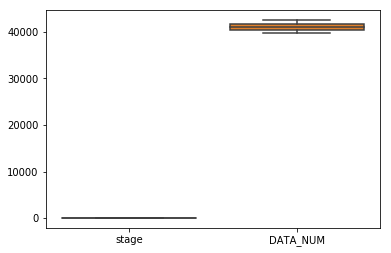

In [16]:
colunas = Base.columns
colunas = colunas[0:2]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

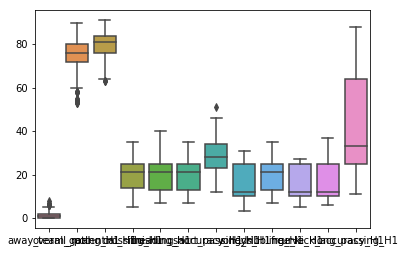

In [17]:
colunas = Base.columns
colunas = colunas[3:15]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

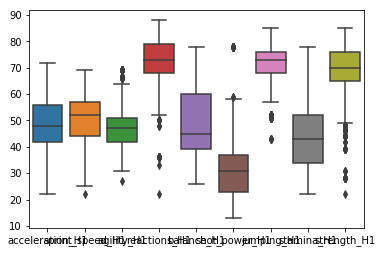

In [18]:
colunas = Base.columns
colunas = colunas[16:25]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

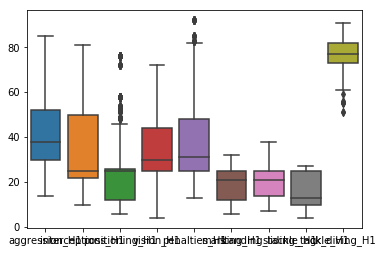

In [19]:
colunas = Base.columns
colunas = colunas[26:35]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

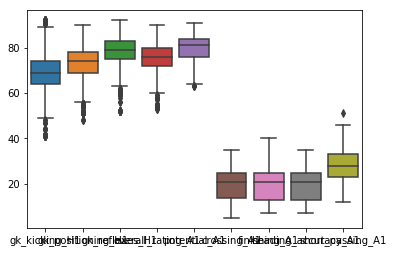

In [20]:
colunas = Base.columns
colunas = colunas[36:45]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

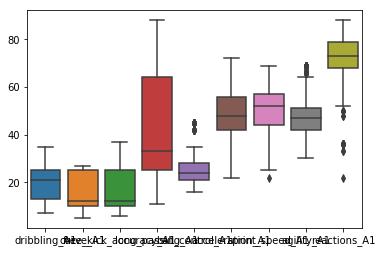

In [21]:
colunas = Base.columns
colunas = colunas[46:55]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

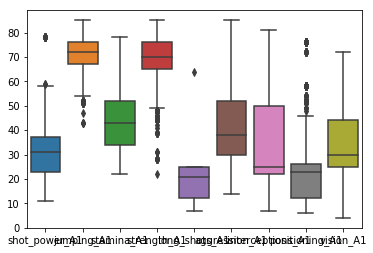

In [22]:
colunas = Base.columns
colunas = colunas[56:65]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

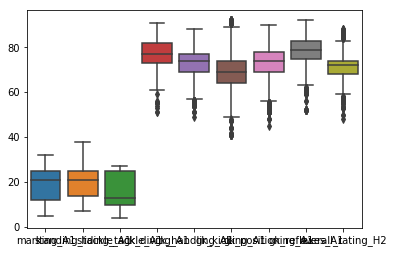

In [23]:
colunas = Base.columns
colunas = colunas[66:75]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

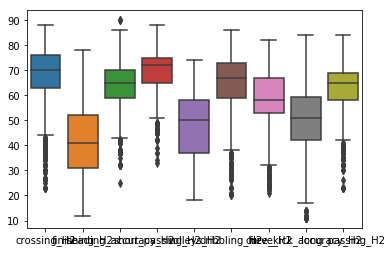

In [24]:
colunas = Base.columns
colunas = colunas[76:85]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

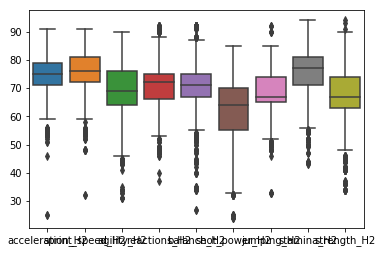

In [25]:
colunas = Base.columns
colunas = colunas[86:95]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

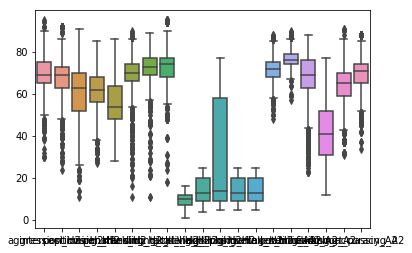

In [26]:
colunas = Base.columns
colunas = colunas[96:115]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

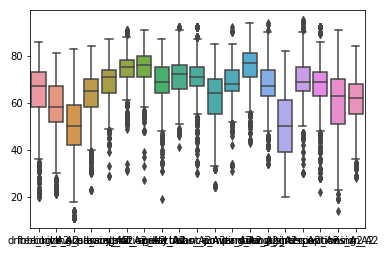

In [27]:
colunas = Base.columns
colunas = colunas[116:135]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

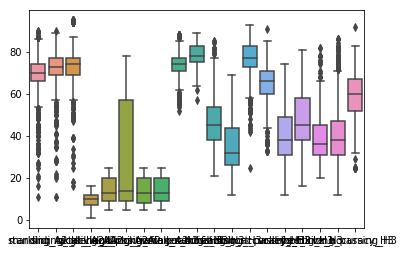

In [28]:
colunas = Base.columns
colunas = colunas[136:155]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

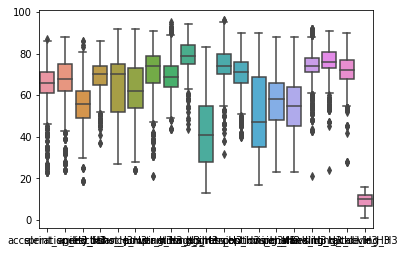

In [29]:
colunas = Base.columns
colunas = colunas[156:175]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

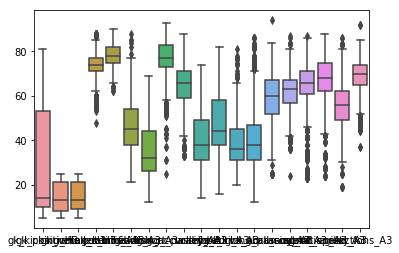

In [30]:
colunas = Base.columns
colunas = colunas[176:195]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

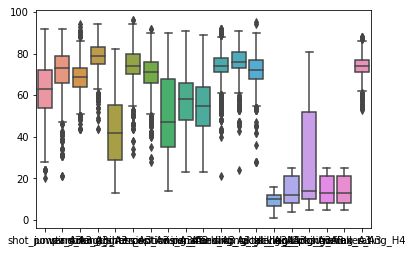

In [31]:
colunas = Base.columns
colunas = colunas[196:215]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

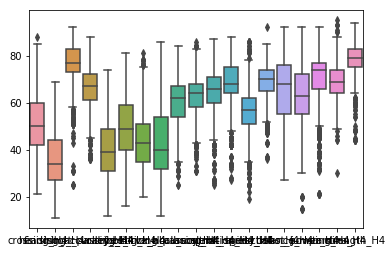

In [32]:
colunas = Base.columns
colunas = colunas[216:235]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

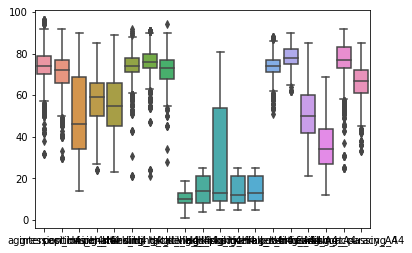

In [33]:
colunas = Base.columns
colunas = colunas[236:255]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

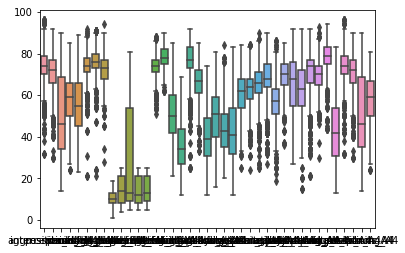

In [34]:
colunas = Base.columns
colunas = colunas[236:275]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

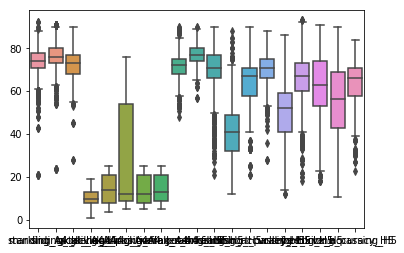

In [35]:
colunas = Base.columns
colunas = colunas[276:295]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

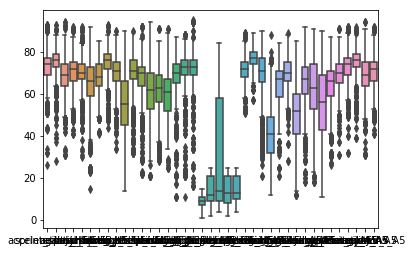

In [36]:
colunas = Base.columns
colunas = colunas[296:335]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

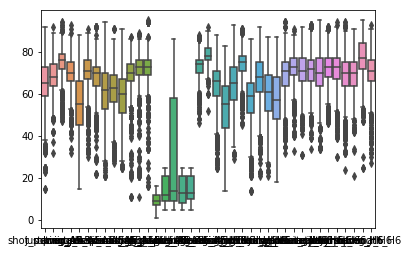

In [37]:
colunas = Base.columns
colunas = colunas[336:375]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

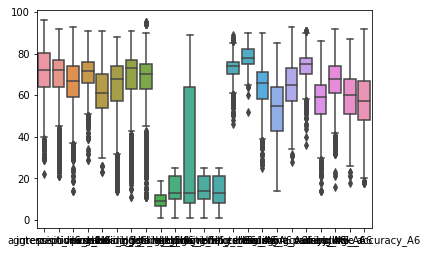

In [38]:
colunas = Base.columns
colunas = colunas[376:399]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

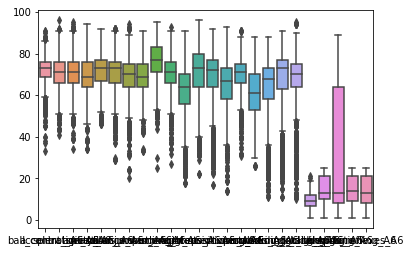

In [39]:
colunas = Base.columns
colunas = colunas[400:424]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

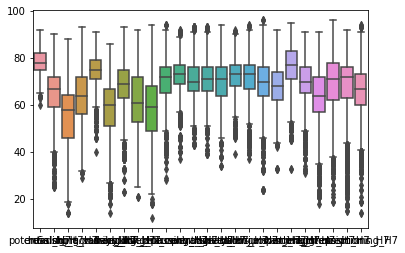

In [40]:
colunas = Base.columns
colunas = colunas[425:449]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

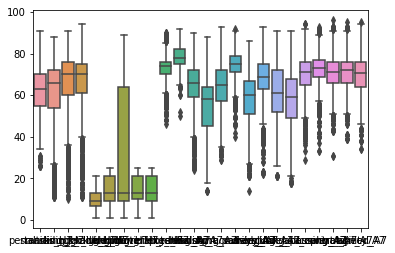

In [41]:
colunas = Base.columns
colunas = colunas[450:474]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

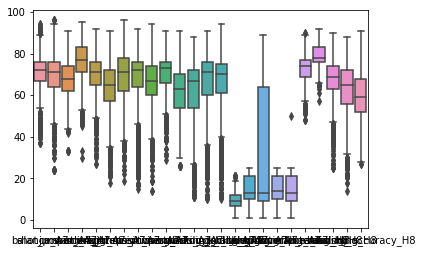

In [42]:
colunas = Base.columns
colunas = colunas[475:499]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

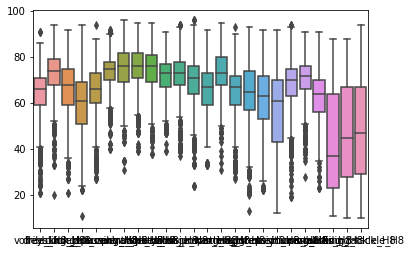

In [43]:
colunas = Base.columns
colunas = colunas[500:524]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

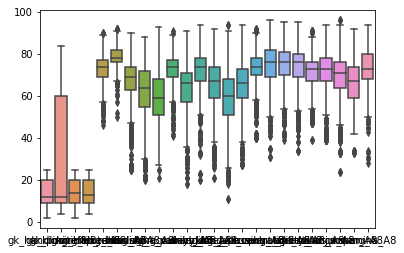

In [44]:
colunas = Base.columns
colunas = colunas[525:549]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

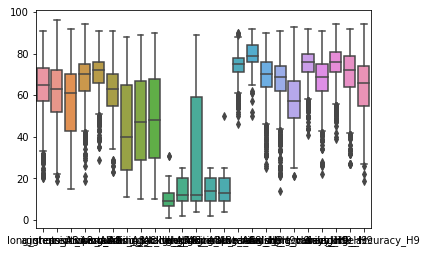

In [45]:
colunas = Base.columns
colunas = colunas[550:574]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

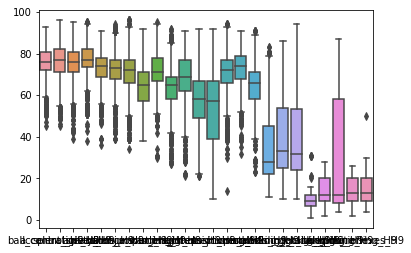

In [46]:
colunas = Base.columns
colunas = colunas[575:599]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

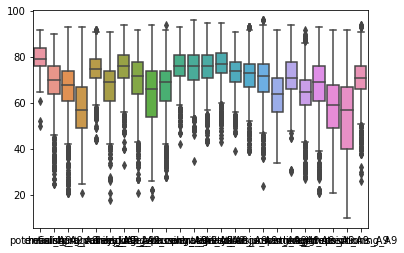

In [47]:
colunas = Base.columns
colunas = colunas[600:624]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

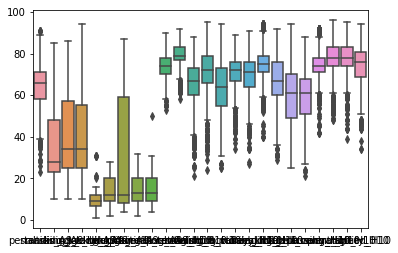

In [48]:
colunas = Base.columns
colunas = colunas[625:649]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

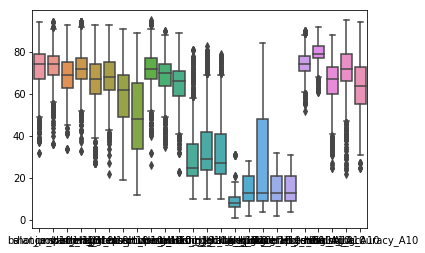

In [49]:
colunas = Base.columns
colunas = colunas[650:674]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

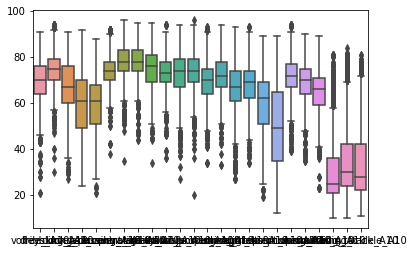

In [50]:
colunas = Base.columns
colunas = colunas[675:699]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

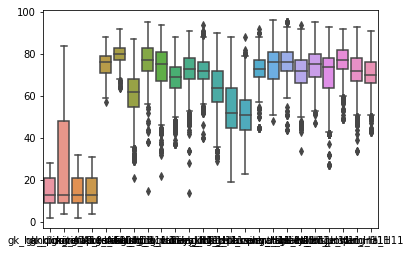

In [51]:
colunas = Base.columns
colunas = colunas[700:724]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

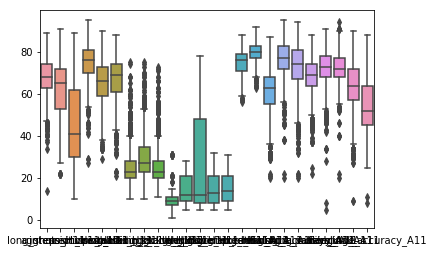

In [52]:
colunas = Base.columns
colunas = colunas[725:749]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

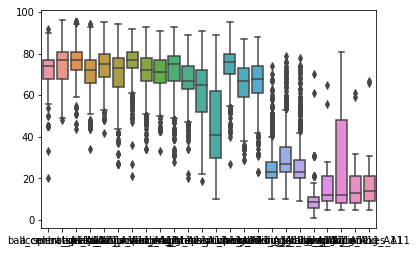

In [53]:
colunas = Base.columns
colunas = colunas[750:774]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

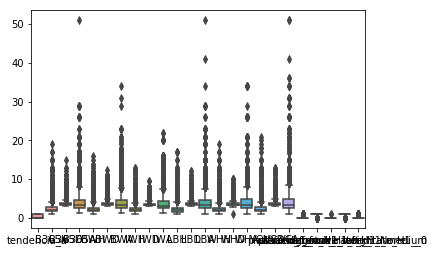

In [54]:
colunas = Base.columns
colunas = colunas[775:799]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[800:824]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[825:849]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[850:899]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[900:949]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[900:949]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[950:999]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1000:1049]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1050:1099]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1100:1199]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

In [64]:
trabWithoutOutliers = Base.copy()

for x in Base.columns:
    superior = Base[x] > (np.mean(Base[x], axis=0)+1.5*np.std(Base[x], axis=0))
    inferior = Base[x] < (np.mean(Base[x], axis=0)-1.5*np.std(Base[x], axis=0))
    trabWithoutOutliers[x][inferior] = (np.mean(Base[x], axis=0)-1.5*np.std(Base[x], axis=0))
    trabWithoutOutliers[x][superior] = (np.mean(Base[x], axis=0)+1.5*np.std(Base[x], axis=0))

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\li

C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabiopda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\fabiopda\AppData\Local\Continuum\an

In [65]:
Base.to_csv("Original.csv")
trabWithoutOutliers.to_csv("Sem_outlier.csv")
Base = trabWithoutOutliers.copy()

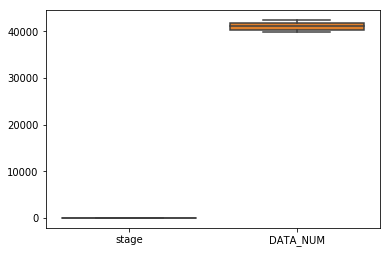

In [66]:
colunas = Base.columns
colunas = colunas[0:2]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

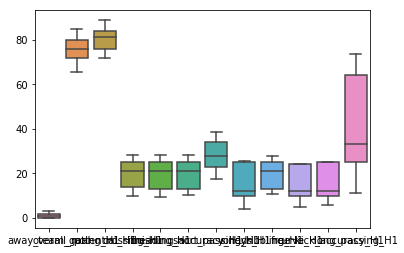

In [67]:
colunas = Base.columns
colunas = colunas[3:15]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

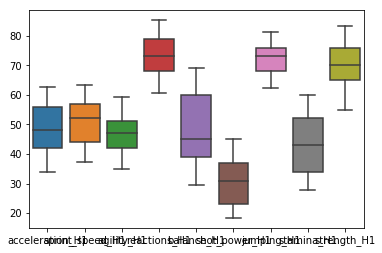

In [68]:
colunas = Base.columns
colunas = colunas[16:25]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

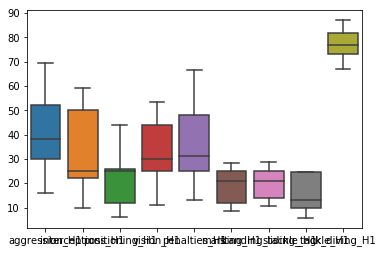

In [69]:
colunas = Base.columns
colunas = colunas[26:35]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

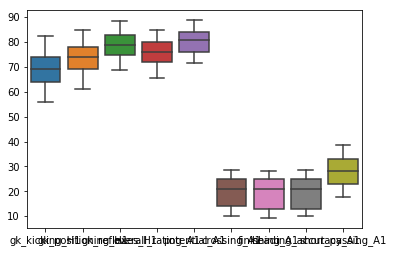

In [70]:
colunas = Base.columns
colunas = colunas[36:45]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

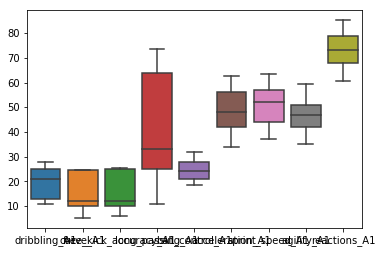

In [71]:
colunas = Base.columns
colunas = colunas[46:55]

Base_Temp = Base[colunas] 
sns.boxplot(data=Base_Temp)

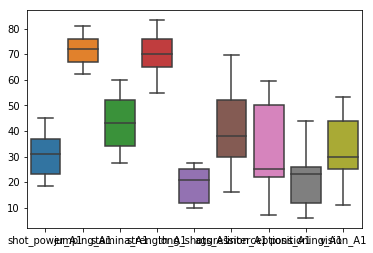

In [72]:
colunas = Base.columns
colunas = colunas[56:65]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

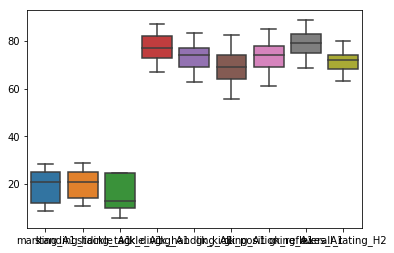

In [73]:
colunas = Base.columns
colunas = colunas[66:75]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

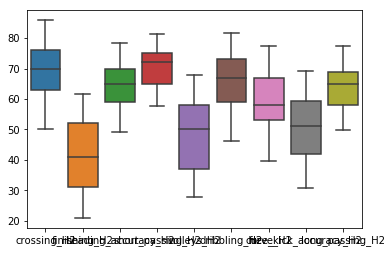

In [74]:
colunas = Base.columns
colunas = colunas[76:85]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

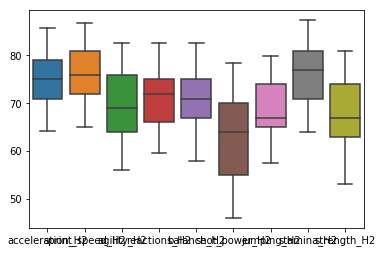

In [75]:
colunas = Base.columns
colunas = colunas[86:95]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

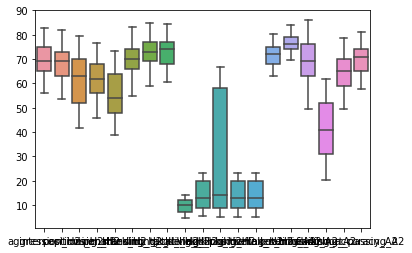

In [76]:
colunas = Base.columns
colunas = colunas[96:115]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

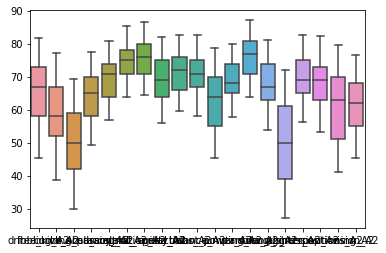

In [77]:
colunas = Base.columns
colunas = colunas[116:135]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

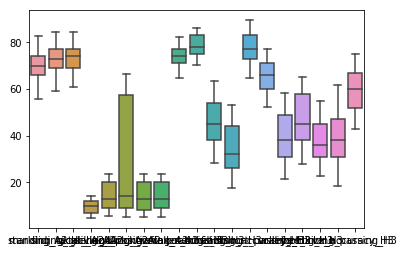

In [78]:
colunas = Base.columns
colunas = colunas[136:155]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

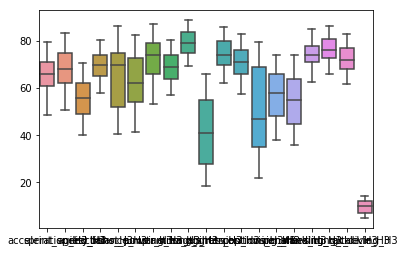

In [79]:
colunas = Base.columns
colunas = colunas[156:175]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

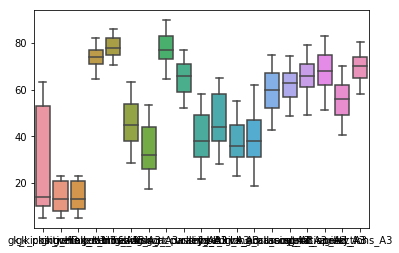

In [80]:
colunas = Base.columns
colunas = colunas[176:195]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

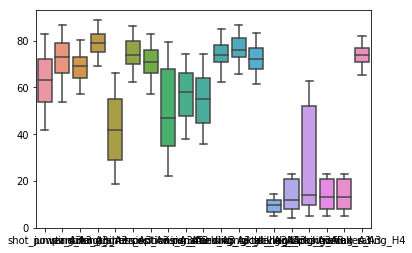

In [81]:
colunas = Base.columns
colunas = colunas[196:215]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

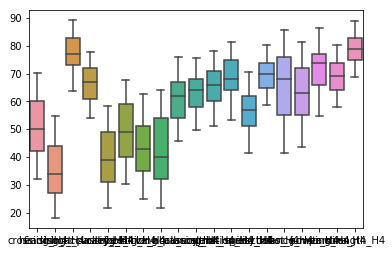

In [82]:
colunas = Base.columns
colunas = colunas[216:235]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

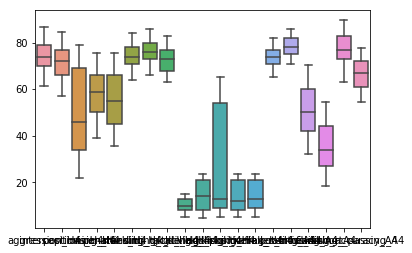

In [83]:
colunas = Base.columns
colunas = colunas[236:255]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

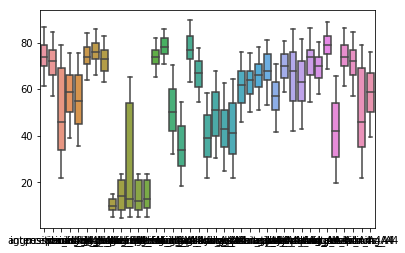

In [84]:
colunas = Base.columns
colunas = colunas[236:275]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

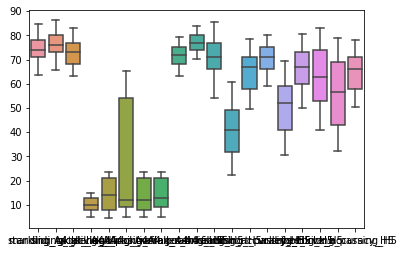

In [85]:
colunas = Base.columns
colunas = colunas[276:295]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

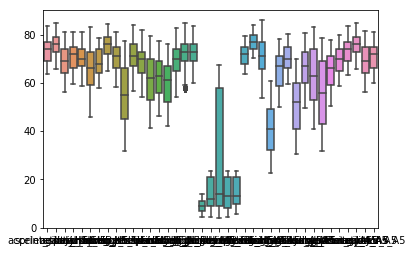

In [86]:
colunas = Base.columns
colunas = colunas[296:335]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

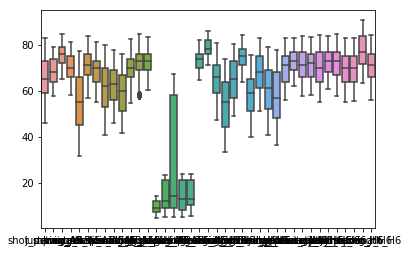

In [87]:
colunas = Base.columns
colunas = colunas[336:375]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

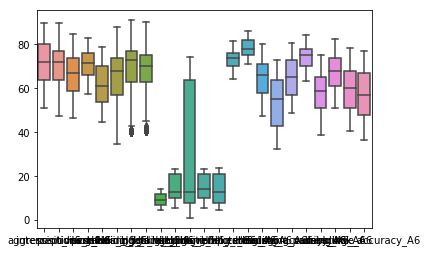

In [88]:
colunas = Base.columns
colunas = colunas[376:399]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

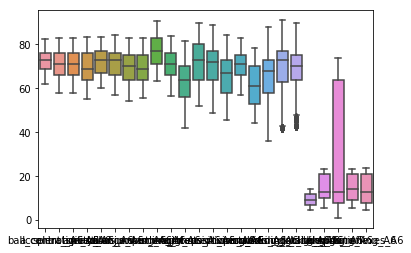

In [89]:
colunas = Base.columns
colunas = colunas[400:424]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

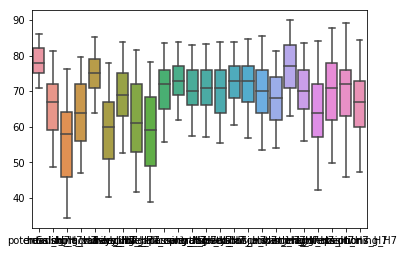

In [90]:
colunas = Base.columns
colunas = colunas[425:449]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

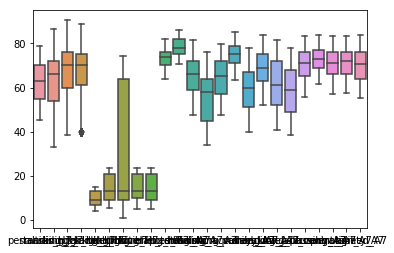

In [91]:
colunas = Base.columns
colunas = colunas[450:474]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

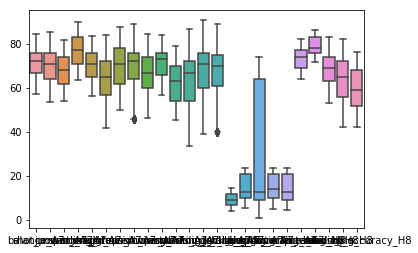

In [92]:
colunas = Base.columns
colunas = colunas[475:499]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

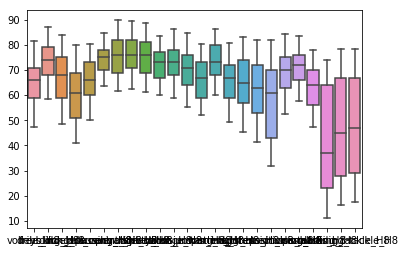

In [93]:
colunas = Base.columns
colunas = colunas[500:524]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

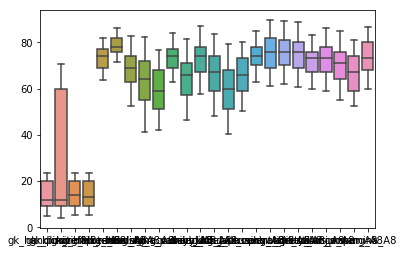

In [94]:
colunas = Base.columns
colunas = colunas[525:549]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

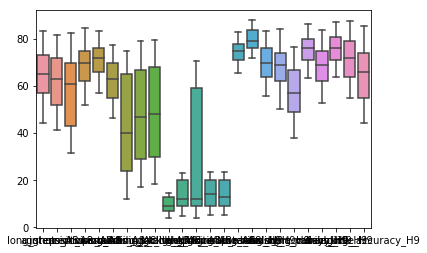

In [95]:
colunas = Base.columns
colunas = colunas[550:574]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

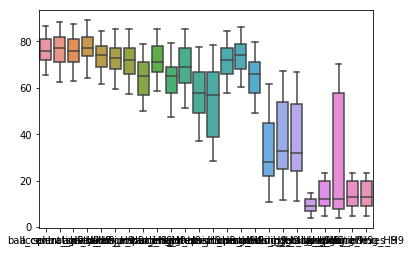

In [96]:
colunas = Base.columns
colunas = colunas[575:599]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

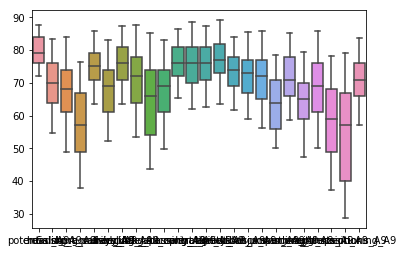

In [97]:
colunas = Base.columns
colunas = colunas[600:624]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

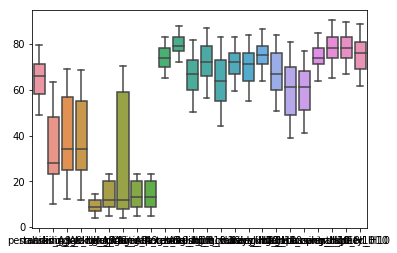

In [98]:
colunas = Base.columns
colunas = colunas[625:649]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

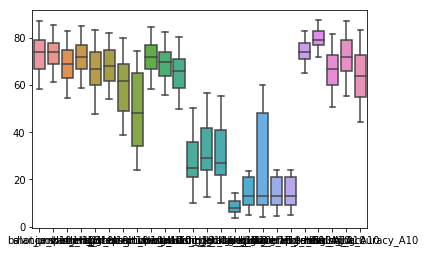

In [99]:
colunas = Base.columns
colunas = colunas[650:674]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

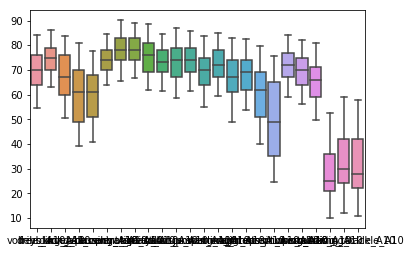

In [100]:
colunas = Base.columns
colunas = colunas[675:699]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

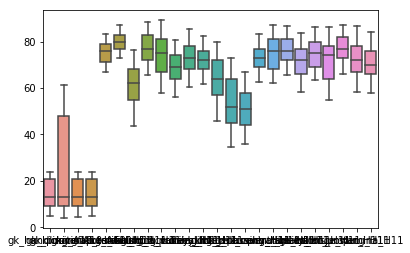

In [101]:
colunas = Base.columns
colunas = colunas[700:724]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

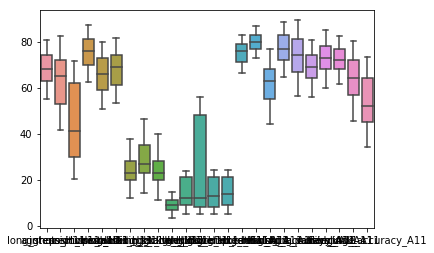

In [102]:
colunas = Base.columns
colunas = colunas[725:749]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

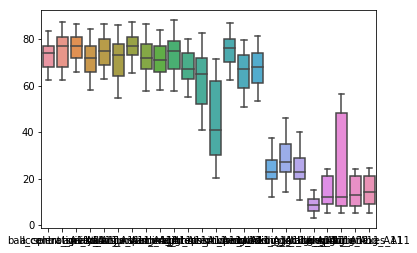

In [103]:
colunas = Base.columns
colunas = colunas[750:774]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

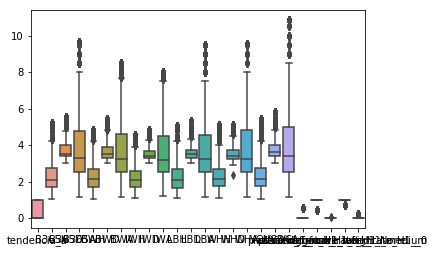

In [104]:
colunas = Base.columns
colunas = colunas[775:799]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[800:824]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[825:849]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[850:899]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[900:949]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[900:949]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[950:999]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1000:1049]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1050:1099]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

colunas = Base.columns
colunas = colunas[1100:1199]

Base_Temp = Base[colunas]
sns.boxplot(data=Base_Temp)

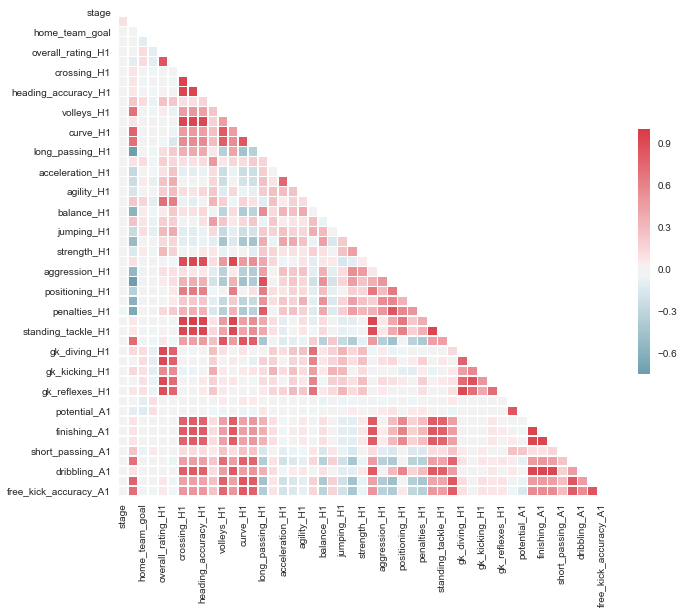

In [114]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[0:49]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

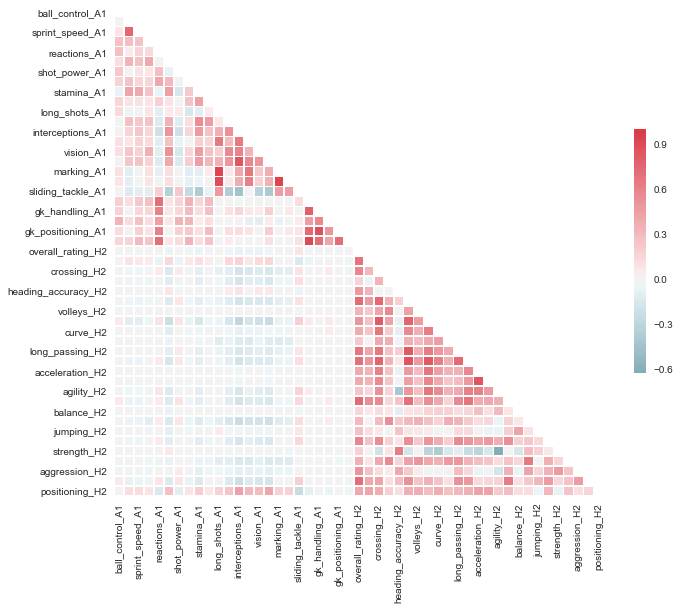

In [115]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[50:99]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

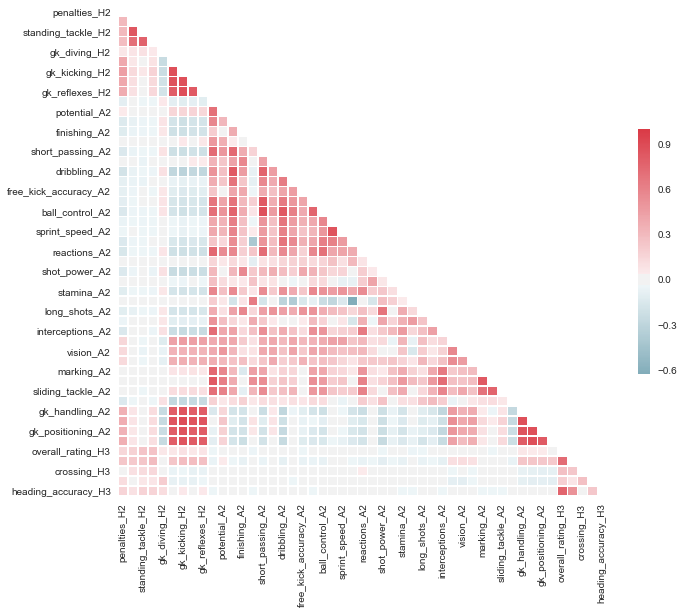

In [116]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[100:149]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

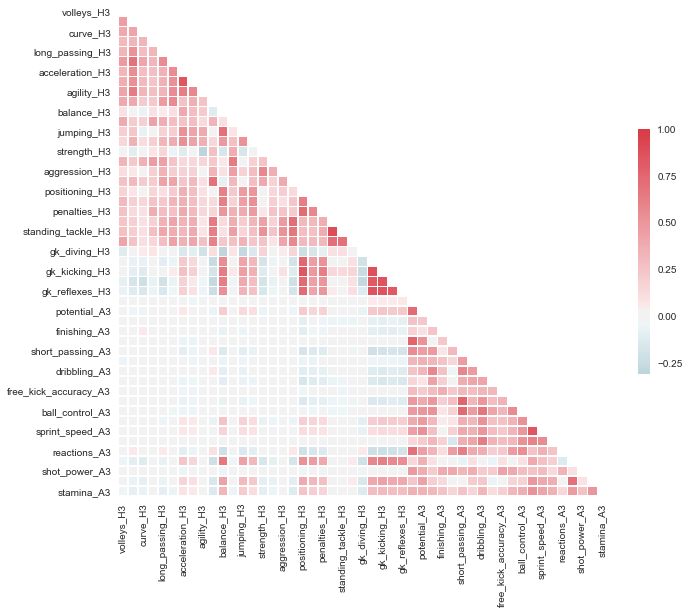

In [117]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[150:199]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

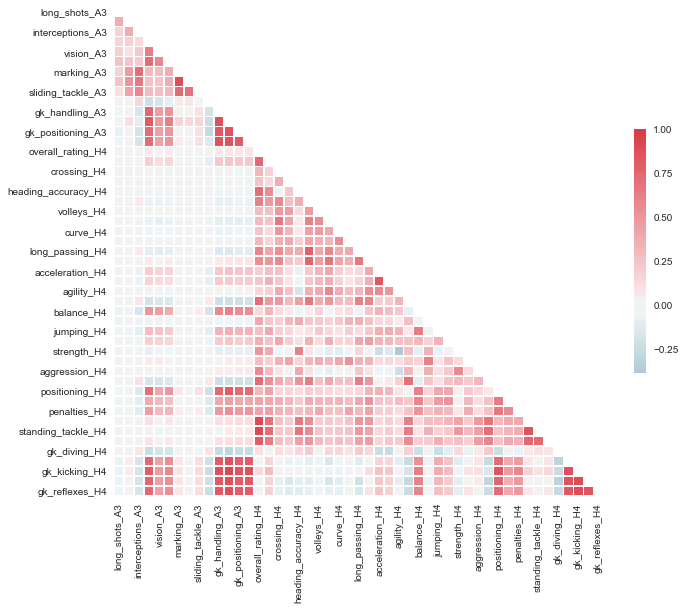

In [118]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[200:249]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

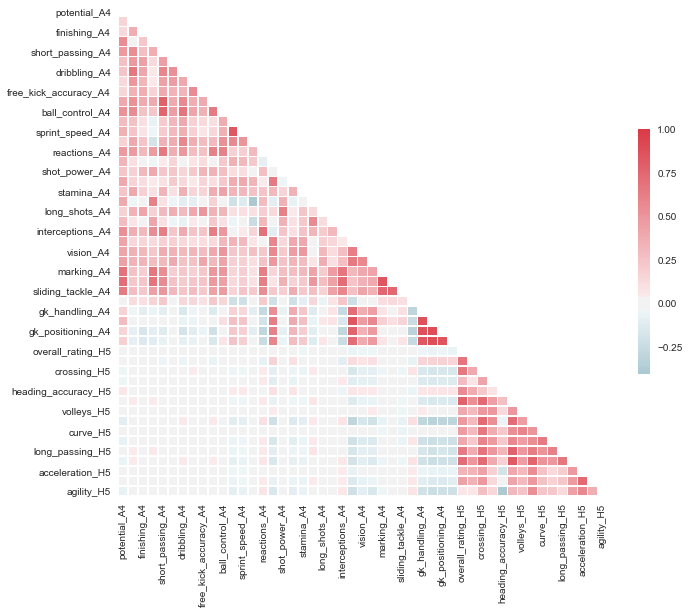

In [119]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[250:299]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

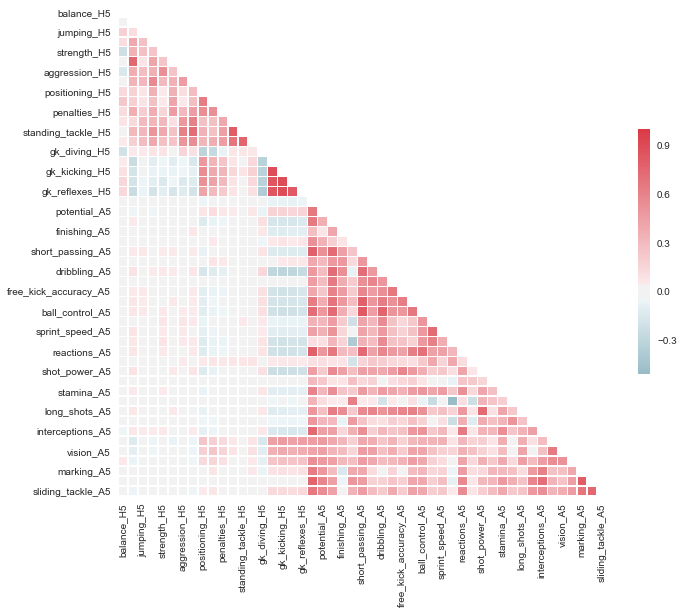

In [120]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[300:349]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

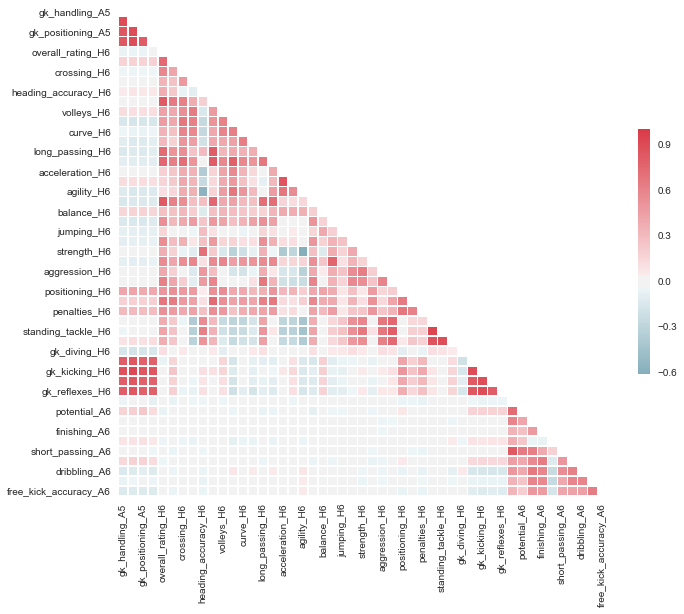

In [121]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[350:399]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

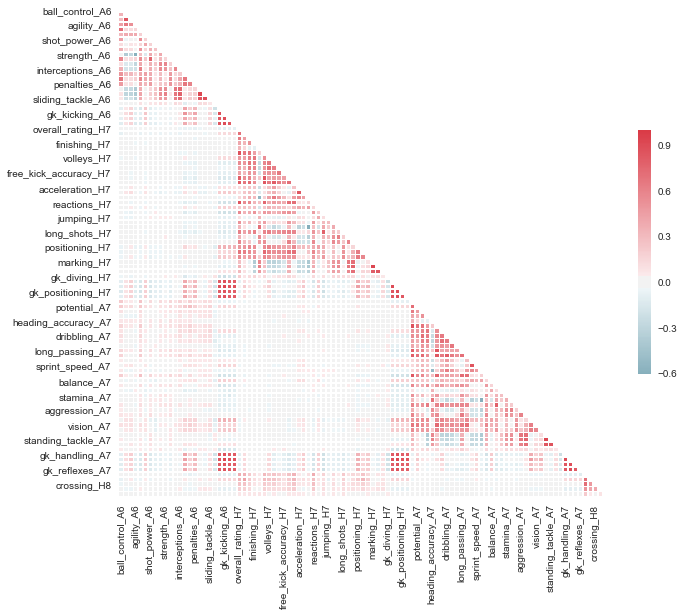

In [122]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[400:499]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

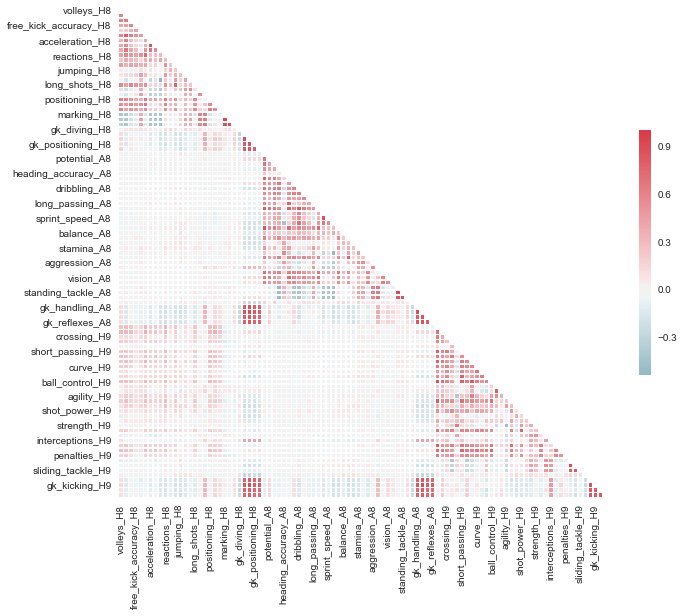

In [123]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[500:599]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

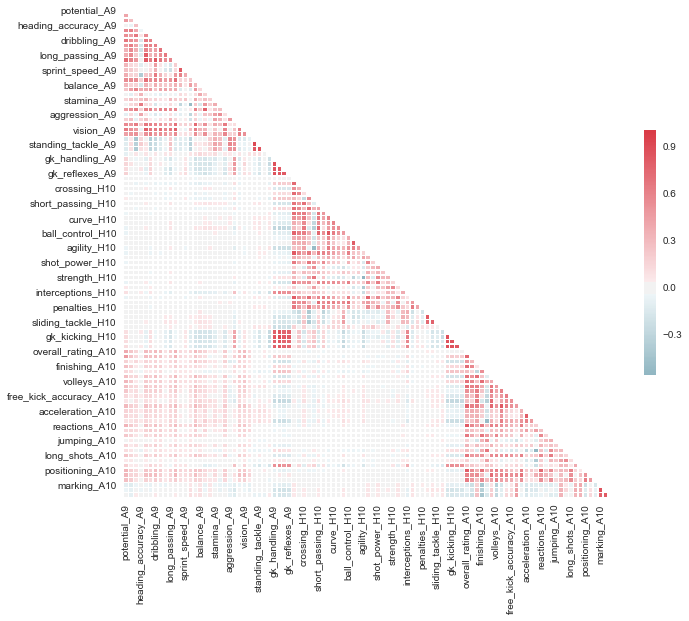

In [124]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[600:699]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

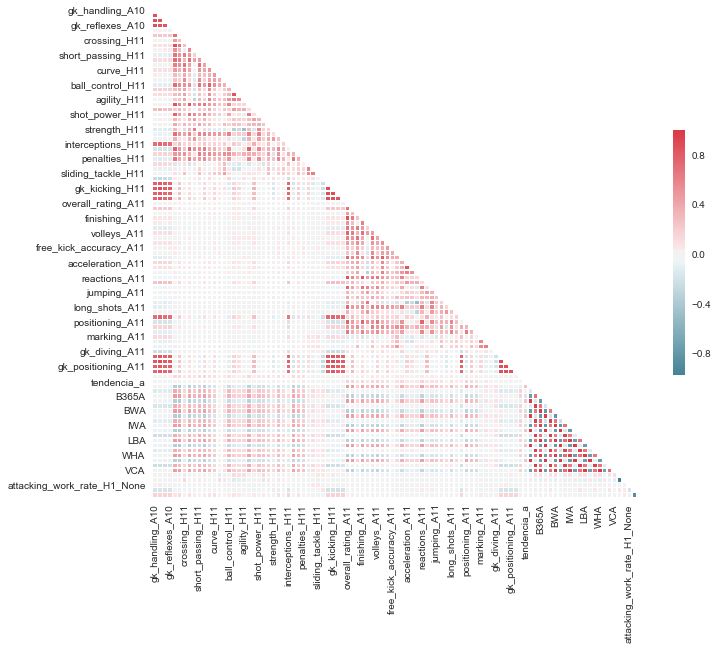

In [125]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[700:799]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

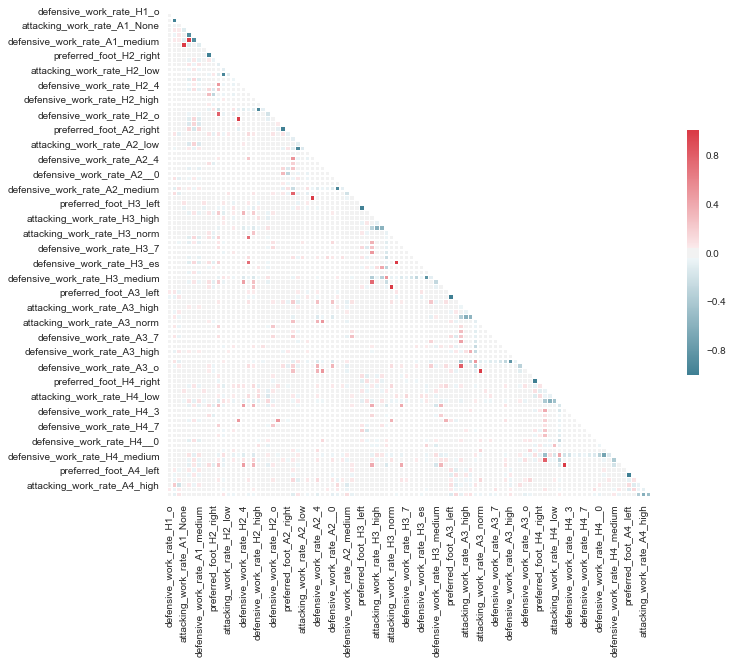

In [126]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[800:899]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

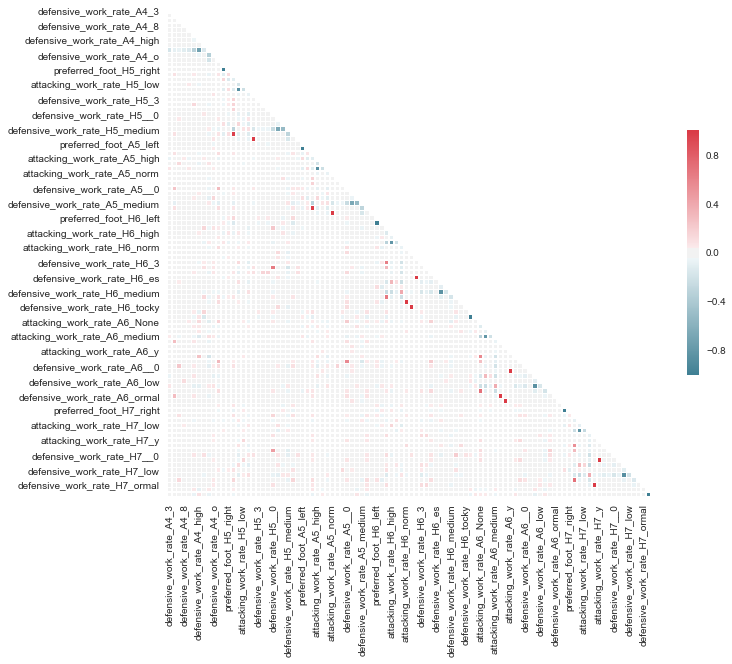

In [127]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[900:999]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

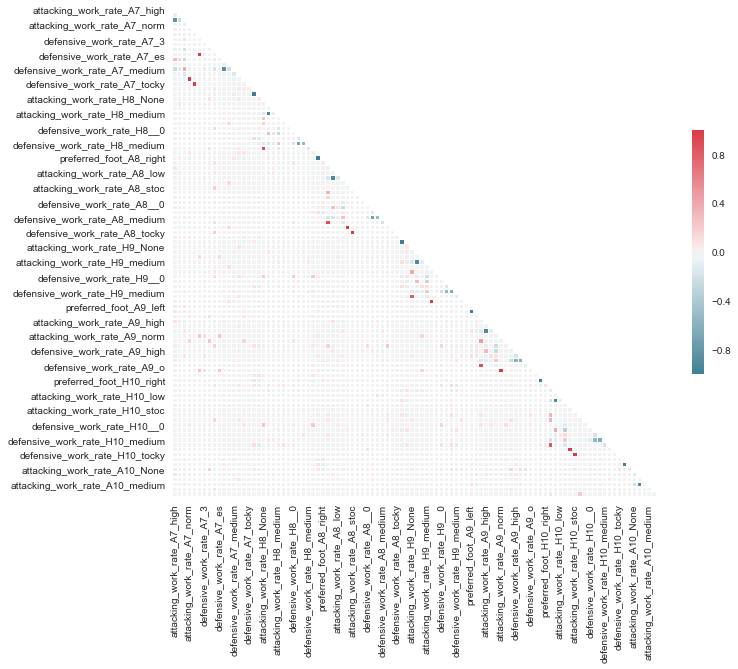

In [128]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[1000:1099]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

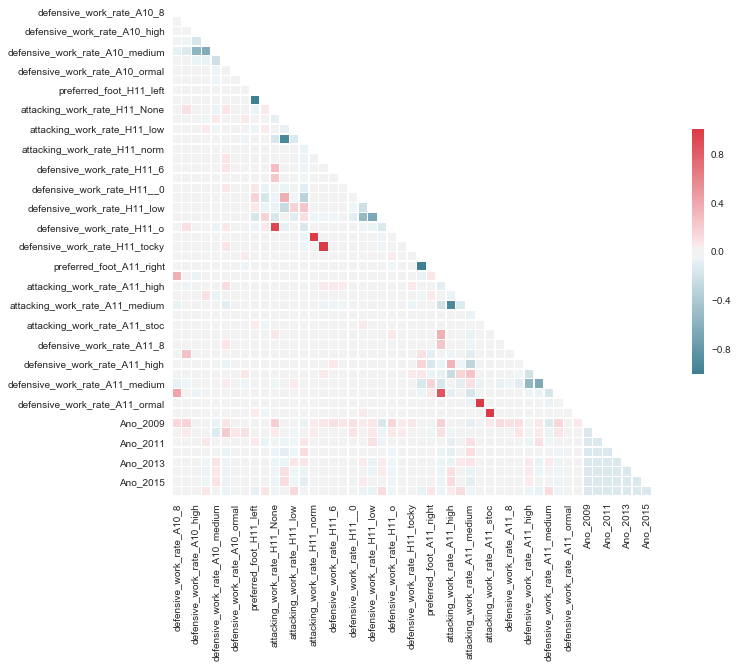

In [129]:
sns.set(style="white")
colunas = Base.columns
colunas = colunas[1100:1199]
d = Base[colunas]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Modelo

In [130]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [131]:
Base = pd.read_csv('Sem_outlier.csv')
Base = Base.drop(['Unnamed: 0'], axis=1)

In [132]:
resultado = []
for linha in range(0,len(Base)):
    if Base['B365H'][linha] == Base['B365A'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['B365H'][linha]/Base['B365A'][linha])
Base['B365F'] = resultado

resultado = []
for linha in range(0,len(Base)):
    if Base['BWH'][linha] == Base['BWA'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['BWH'][linha]/Base['BWA'][linha])
Base['BWF'] = resultado

resultado = []
for linha in range(0,len(Base)):
    if Base['IWH'][linha] == Base['IWA'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['IWH'][linha]/Base['IWA'][linha])
Base['IWF'] = resultado

resultado = []
for linha in range(0,len(Base)):
    if Base['LBH'][linha] == Base['LBA'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['LBH'][linha]/Base['LBA'][linha])
Base['LBF'] = resultado

resultado = []
for linha in range(0,len(Base)):
    if Base['WHH'][linha] == Base['WHA'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['WHH'][linha]/Base['WHA'][linha])
Base['WHF'] = resultado

resultado = []
for linha in range(0,len(Base)):
    if Base['VCH'][linha] == Base['VCA'][linha]:
        resultado.append(0)
    else:
        resultado.append(Base['VCH'][linha]/Base['VCA'][linha])
Base['VCF'] = resultado

## Time da Casa

In [133]:
resultado = []

Base_aux = Base.copy()

for linha in range(0,len(Base)):
    if Base['home_team_goal'][linha] > Base['away_team_goal'][linha]:
        resultado.append(1)
    elif Base['home_team_goal'][linha] == Base['away_team_goal'][linha]:
        resultado.append(0)
    else:
        resultado.append(0)
Base['Resultado_Casa'] = resultado

Base = Base.drop(['home_team_goal','away_team_goal'], axis=1)

In [134]:
Base_Aplicacao = Base.query("Ano_2016 > 0")
Base = Base.query("Ano_2016 == 0")
Base = Base.drop(['Ano_2009','Ano_2010','Ano_2011','Ano_2012','Ano_2013','Ano_2014','Ano_2015','Ano_2016'], axis=1)

In [135]:
X = Base.drop(['Resultado_Casa'], axis=1)
y = Base.Resultado_Casa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [136]:
clf_h = RandomForestClassifier(criterion = 'entropy', max_depth=16, max_features=55,n_estimators=200,random_state=42)

clf_h.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=16, max_features=55, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [137]:
acc = accuracy_score(y_test, clf_h.predict(X_test))
print("Accuracy: %.4f" % acc)
print()

probs_h = clf_h.predict_proba(X_test)
auc_ = roc_auc_score(y_test, probs_h[:,1])
print("AUC: %.4f" % auc_)

Accuracy: 0.5801

AUC: 0.6356


## Visitante

In [138]:
resultado = []

Base = Base_aux.copy()

for linha in range(0,len(Base)):
    if Base['home_team_goal'][linha] > Base['away_team_goal'][linha]:
        resultado.append(0)
    elif Base['home_team_goal'][linha] == Base['away_team_goal'][linha]:
        resultado.append(0)
    else:
        resultado.append(1)
Base['Resultado_Visitante'] = resultado

Base = Base.drop(['home_team_goal','away_team_goal'], axis=1)

In [139]:
Base

,stage,DATA_NUM,overall_rating_H1,potential_H1,crossing_H1,finishing_H1,heading_accuracy_H1,short_passing_H1,volleys_H1,dribbling_H1,...,Ano_2014,Ano_2015,Ano_2016,B365F,BWF,IWF,LBF,WHF,VCF,Resultado_Visitante
0,3.000000,40047.000000,67.000000,73.000000,20.000000,20.0,20.000000,24.000000,9.0,20.0,...,0.000000,0.000000,0.000000,0.827586,0.961538,0.842105,0.915385,0.923077,0.000000,0
1,13.000000,40137.000000,80.000000,87.000000,21.000000,21.0,21.000000,27.000000,11.0,21.0,...,0.000000,0.000000,0.000000,0.294545,0.330000,0.285714,0.314000,0.292727,0.334000,0
2,24.000000,39884.000000,72.000000,74.000000,22.000000,22.0,22.000000,31.000000,7.0,22.0,...,0.000000,0.000000,0.000000,0.666667,0.646154,0.617647,0.666667,0.661290,0.750000,0
3,26.000000,39905.000000,65.630427,71.687291,20.000000,20.0,20.000000,35.000000,11.0,20.0,...,0.000000,0.000000,0.000000,1.666667,1.775000,1.595238,1.666667,1.666667,1.619048,1
4,22.000000,39871.000000,76.000000,81.000000,20.000000,20.0,20.000000,28.000000,11.0,20.0,...,0.000000,0.000000,0.000000,1.900000,1.658537,1.595238,1.625000,1.512195,1.700000,1
5,19.000000,40564.000000,65.630427,75.000000,20.000000,20.0,20.000000,24.000000,9.0,20.0,...,0.000000,0.000000,0.000000,0.126326,0.141436,0.149801,0.126567,0.131394,0.115362,0
6,27.000000,40619.000000,76.000000,80.000000,23.000000,23.0,23.000000,27.000000,9.0,23.0,...,0.000000,0.000000,0.000000,0.725806,0.716667,0.677419,0.725806,0.709677,0.681818,1
7,11.000000,40488.000000,84.000000,88.000000,23.000000,23.0,23.000000,23.000000,12.0,23.0,...,0.000000,0.000000,0.000000,0.221538,0.254386,0.200000,0.175000,0.221538,0.192000,0
8,29.000000,39927.000000,82.000000,85.000000,21.000000,21.0,21.000000,35.000000,11.0,21.0,...,0.000000,0.000000,0.000000,0.214286,0.200000,0.207143,0.194286,0.215385,0.207143,0
9,2.783937,39830.400896,74.000000,83.000000,20.000000,20.0,20.000000,33.000000,18.0,20.0,...,0.000000,0.000000,0.000000,0.676923,0.656250,0.733333,0.700000,0.700000,0.677419,0


In [140]:
Base = Base.query("Ano_2016 != 1")
Base = Base.drop(['Ano_2009','Ano_2010','Ano_2011','Ano_2012','Ano_2013','Ano_2014','Ano_2015','Ano_2016'], axis=1)

In [141]:
X = Base.drop(['Resultado_Visitante'], axis=1)
y = Base.Resultado_Visitante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## RandomForestClassifier

In [142]:
clf_a = RandomForestClassifier(criterion='gini',max_depth=16,max_features=55,n_estimators=200,random_state=42)
clf_a.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features=55, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [143]:
acc = accuracy_score(y_test, clf_a.predict(X_test))
print("Accuracy: %.4f" % acc)
print()

probs_a = clf_a.predict_proba(X_test)
auc_ = roc_auc_score(y_test, probs_a[:,1])
print("AUC: %.4f" % auc_)

Accuracy: 0.7102

AUC: 0.6310


## Junta Tudo

In [144]:
Base_Final = Base_aux.copy()
probs_h = clf_h.predict_proba(X)
probs_a = clf_a.predict_proba(X)

In [145]:
Base_Final['Resultado_H'] = list(probs_h[:,1])
Base_Final['Resultado_A'] = list(probs_a[:,1])

## Teste Comparação 2 modelos

In [146]:
Base_Comparacao = pd.DataFrame()

Base_Comparacao['home_team_goal'] = Base_Final.home_team_goal
Base_Comparacao['away_team_goal'] = Base_Final.away_team_goal

Base_Comparacao['Resultado_H'] = Base_Final.Resultado_H
Base_Comparacao['Resultado_A'] = Base_Final.Resultado_A

In [147]:
resultado = []
resultado_previsto = []
Base = Base_Final.copy()

for linha in range(0,len(Base)):
    if Base['home_team_goal'][linha] > Base['away_team_goal'][linha]:
        resultado.append(2)
    elif Base['home_team_goal'][linha] == Base['away_team_goal'][linha]:
        resultado.append(1)
    else:
        resultado.append(0)
        
    if Base['Resultado_H'][linha] > (Base['Resultado_A'][linha] + 0.07):
        resultado_previsto.append(2)
    elif (Base['Resultado_H'][linha] + 0.07) < Base['Resultado_A'][linha]:
        resultado_previsto.append(0)
    else:
        resultado_previsto.append(1)

Base['Resultado'] = resultado
Base['Resultado_Previsto'] = resultado_previsto

Base = Base.drop(['home_team_goal','away_team_goal'], axis=1)

In [148]:
print("Acuracia Final = ",accuracy_score(resultado, resultado_previsto))

Acuracia Final =  0.752859477124183


_____________________________________________________________________________________________________________

## Simular se tivessemos apostado 10 reais por jogo da ultima temporada

In [149]:
Base = Base_Aplicacao.copy()
Base = Base.drop(['Ano_2009','Ano_2010','Ano_2011','Ano_2012','Ano_2013','Ano_2014','Ano_2015','Ano_2016'], axis=1)

In [150]:
X = Base.drop(['Resultado_Casa'], axis=1)
y = Base.Resultado_Casa

In [151]:
Base_Final = Base_aux.copy()
probs_h = clf_h.predict_proba(X)
probs_a = clf_a.predict_proba(X)

In [152]:
Base = Base_Final.query("Ano_2016 > 0")
Base = Base.drop(['Ano_2009','Ano_2010','Ano_2011','Ano_2012','Ano_2013','Ano_2014','Ano_2015','Ano_2016'], axis=1)

In [153]:
Base['Resultado_H'] = list(probs_h[:,1])
Base['Resultado_A'] = list(probs_a[:,1])

## Teste Comparação 2 modelos

In [154]:
Base_Comparacao = pd.DataFrame()

Base_Comparacao['home_team_goal'] = list(Base.home_team_goal)
Base_Comparacao['away_team_goal'] = list(Base.away_team_goal)

Base_Comparacao['Resultado_H'] = list(Base.Resultado_H)
Base_Comparacao['Resultado_A'] = list(Base.Resultado_A)

In [155]:
resultado = []
resultado_previsto = []
Base = Base_Comparacao.copy()
for linha in range(0,len(Base)):
    if int(Base['home_team_goal'][linha]) > int(Base['away_team_goal'][linha]):
        resultado.append(2)
    elif Base['home_team_goal'][linha] == Base['away_team_goal'][linha]:
        resultado.append(1)
    else:
        resultado.append(0)
        
    if Base['Resultado_H'][linha] > (Base['Resultado_A'][linha] + 0.07):
        resultado_previsto.append(2)
    elif (Base['Resultado_H'][linha] + 0.07) < Base['Resultado_A'][linha]:
        resultado_previsto.append(0)
    else:
        resultado_previsto.append(1)

Base['Resultado'] = resultado
Base['Resultado_Previsto'] = resultado_previsto

#Base = Base.drop(['home_team_goal','away_team_goal'], axis=1)

In [156]:
print("Acuracia Final = ",accuracy_score(resultado, resultado_previsto))

Acuracia Final =  0.6405228758169934


In [157]:
Base.to_csv("Base_Final_compara.csv")
Base = Base.drop(['home_team_goal','away_team_goal','Resultado'], axis=1)
Base.to_csv("Base_Final.csv")

In [158]:
variaveis_h = clf_h.feature_importances_
variaveis_a = clf_a.feature_importances_

In [159]:
print(sum(variaveis_h >= 0.001),sum(variaveis_a >= 0.001))

530 497


In [160]:
Base_resultado_final = pd.read_csv('Cabecalho_Base_Final.csv')
Base_resultado_final['Resultado_H'] = Base.Resultado_H
Base_resultado_final['Resultado_A'] = Base.Resultado_A
Base_resultado_final['Resultado_Previsto'] = Base.Resultado_Previsto
Base_resultado_final.to_csv("Base_Envio.csv")

In [161]:
variaveis_h = clf_h.feature_importances_
variaveis_a = clf_a.feature_importances_

In [175]:
import_var_h = pd.DataFrame(variaveis_h)
import_var_h['nome'] = pd.DataFrame(X.columns)
import_var_h_sortef = import_var_h.sort_values(by=0, ascending = False)

In [176]:
import_var_h_sortef

,0,nome
785,0.007864,LBA
1143,0.006080,LBF
1145,0.005993,VCF
1141,0.005911,BWF
783,0.005603,LBH
1142,0.005595,IWF
774,0.005564,B365H
791,0.005560,VCA
777,0.004977,BWH
788,0.004950,WHA


In [172]:
import_var_a = pd.DataFrame(variaveis_a)
import_var_a['nome'] = pd.DataFrame(X.columns)
import_var_a_sortef = import_var_a.sort_values(by=0, ascending = False)

In [173]:
import_var_a_sortef

,0,nome
788,0.008503,WHA
1141,0.007239,BWF
1145,0.007161,VCF
785,0.006883,LBA
776,0.006045,B365A
783,0.005891,LBH
791,0.005859,VCA
780,0.005670,IWH
1140,0.005663,B365F
782,0.005507,IWA
